In [2]:
#import necessary liabries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import itertools
import math
from matplotlib.legend_handler import HandlerBase
sns.set(style='darkgrid',font_scale=1.5)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
soccer_data = pd.read_csv("../Data/soccer-spi/soccer_matches_df.csv",index_col=0)
club_data = pd.read_csv("../Data/soccer-spi/spi_data_df.csv",index_col=0)

In [4]:
#view the first 5 rows
soccer_data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,results,B365_Home,B365_Draw,B365A_way
0,2016,2016-08-12,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,0.97,0.63,0.43,0.45,0.00,1.05,NaN,NaN,NaN,NaN
1,2016,2016-08-12,1843.0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2.45,0.77,1.75,0.42,2.10,2.10,NaN,NaN,NaN,NaN
2,2016,2016-08-13,2411.0,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,0.85,2.77,0.17,1.25,2.10,1.05,NaN,NaN,NaN,NaN
3,2016,2016-08-13,2411.0,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,0.73,1.11,0.88,1.81,1.05,1.05,NaN,NaN,NaN,NaN
4,2016,2016-08-13,2411.0,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1.11,0.68,0.84,1.60,0.00,1.05,NaN,NaN,NaN,NaN


In [5]:
#check the shape
soccer_data.shape

(24750, 27)

In [6]:
#view the club dataset
club_data.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Bayern Munich,German Bundesliga,3.64,0.51,93.72
1,2,2,Manchester City,Barclays Premier League,2.97,0.24,93.57
2,3,3,Liverpool,Barclays Premier League,3.06,0.46,91.04
3,4,4,Chelsea,Barclays Premier League,2.47,0.24,90.32
5,6,6,Real Madrid,Spanish Primera Division,2.57,0.62,84.21


In [7]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24750 entries, 0 to 24749
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       24750 non-null  int64  
 1   date         24750 non-null  object 
 2   league_id    13680 non-null  float64
 3   league       24750 non-null  object 
 4   team1        24750 non-null  object 
 5   team2        24750 non-null  object 
 6   spi1         13680 non-null  float64
 7   spi2         13680 non-null  float64
 8   prob1        13680 non-null  float64
 9   prob2        13680 non-null  float64
 10  probtie      13680 non-null  float64
 11  proj_score1  13680 non-null  float64
 12  proj_score2  13680 non-null  float64
 13  importance1  11994 non-null  float64
 14  importance2  11994 non-null  float64
 15  score1       23390 non-null  float64
 16  score2       23390 non-null  float64
 17  xg1          12314 non-null  float64
 18  xg2          12314 non-null  float64
 19  nsxg

In [8]:
#check the description of the dataset
soccer_data.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,B365_Home,B365_Draw,B365A_way
count,24750.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,11994.000000,...,23390.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,9660.000000,9660.000000,9660.000000
mean,2018.347717,1958.655629,63.577162,63.476290,0.458527,0.300371,0.241103,1.568612,1.189004,33.883250,...,1.204190,1.568042,1.246478,1.450485,1.183272,1.592817,1.248203,2.847969,4.039480,4.504832
std,1.564454,205.612514,15.665622,15.726236,0.174071,0.158286,0.049817,0.465360,0.459225,26.350038,...,1.159051,0.887404,0.782651,0.711202,0.621314,1.286074,1.158185,2.119511,1.285261,3.807476
min,2016.000000,1818.000000,19.990000,19.290000,0.027000,0.003200,0.000000,0.240000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,1.100000
25%,2017.000000,1845.000000,54.840000,54.737500,0.349675,0.196400,0.223200,1.260000,0.890000,14.000000,...,0.000000,0.910000,0.660000,0.950000,0.740000,1.050000,0.000000,1.720000,3.390000,2.380000
50%,2018.000000,1854.000000,64.410000,64.380000,0.451150,0.279300,0.252400,1.490000,1.120000,28.600000,...,1.000000,1.430000,1.100000,1.340000,1.080000,1.050000,1.050000,2.250000,3.600000,3.300000
75%,2020.000000,1951.000000,74.440000,74.352500,0.558325,0.378725,0.273000,1.790000,1.400000,49.300000,...,2.000000,2.080000,1.670000,1.817500,1.490000,2.100000,2.100000,3.000000,4.200000,5.000000
max,2021.000000,2411.000000,96.570000,96.780000,0.977500,0.881600,0.342300,4.030000,3.430000,100.000000,...,9.000000,7.070000,5.990000,6.890000,5.920000,8.760000,7.230000,23.000000,21.000000,41.000000


In [9]:
club_data.describe()

,rank,prev_rank,off,def,spi
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,118.804688,118.867188,1.762266,1.040391,61.447266
std,112.485104,112.590077,0.420177,0.365005,14.928278
min,1.000000,1.000000,1.000000,0.240000,23.930000
25%,38.750000,38.750000,1.467500,0.787500,51.377500
50%,79.500000,79.500000,1.700000,0.995000,63.295000
75%,164.250000,168.750000,1.980000,1.250000,71.595000
max,513.000000,513.000000,3.640000,2.090000,93.720000


Now we are going to create our target using the scores from the two games, Home and Away. I will drop the result column since we are not going to need it.

In [10]:
#drop the result column
soccer_data=soccer_data.drop(['results','league_id'],axis=1)
soccer_data.head()

,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,B365_Home,B365_Draw,B365A_way
0,2016,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,1.0,0.97,0.63,0.43,0.45,0.00,1.05,NaN,NaN,NaN
1,2016,2016-08-12,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.45,0.77,1.75,0.42,2.10,2.10,NaN,NaN,NaN
2,2016,2016-08-13,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,1.0,0.85,2.77,0.17,1.25,2.10,1.05,NaN,NaN,NaN
3,2016,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,0.73,1.11,0.88,1.81,1.05,1.05,NaN,NaN,NaN
4,2016,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.0,1.11,0.68,0.84,1.60,0.00,1.05,NaN,NaN,NaN


In [11]:
soccer_data.shape

(24750, 25)

In [12]:
soccer_data.isna().sum()

season             0
date               0
league             0
team1              0
team2              0
spi1           11070
spi2           11070
prob1          11070
prob2          11070
probtie        11070
proj_score1    11070
proj_score2    11070
importance1    12756
importance2    12756
score1          1360
score2          1360
xg1            12436
xg2            12436
nsxg1          12436
nsxg2          12436
adj_score1     12436
adj_score2     12436
B365_Home      15090
B365_Draw      15090
B365A_way      15090
dtype: int64

In [13]:
#remove the null values in score1 column
soccer_data = soccer_data[soccer_data['score1'].notna()]
soccer_data.head()

,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,B365_Home,B365_Draw,B365A_way
0,2016,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,1.0,0.97,0.63,0.43,0.45,0.00,1.05,NaN,NaN,NaN
1,2016,2016-08-12,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.45,0.77,1.75,0.42,2.10,2.10,NaN,NaN,NaN
2,2016,2016-08-13,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,1.0,0.85,2.77,0.17,1.25,2.10,1.05,NaN,NaN,NaN
3,2016,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,0.73,1.11,0.88,1.81,1.05,1.05,NaN,NaN,NaN
4,2016,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.0,1.11,0.68,0.84,1.60,0.00,1.05,NaN,NaN,NaN


In [14]:
#remove the null values in score2 column
soccer_data = soccer_data[soccer_data['score2'].notna()]
soccer_data.head()

,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,B365_Home,B365_Draw,B365A_way
0,2016,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,1.0,0.97,0.63,0.43,0.45,0.00,1.05,NaN,NaN,NaN
1,2016,2016-08-12,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.45,0.77,1.75,0.42,2.10,2.10,NaN,NaN,NaN
2,2016,2016-08-13,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,1.0,0.85,2.77,0.17,1.25,2.10,1.05,NaN,NaN,NaN
3,2016,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,0.73,1.11,0.88,1.81,1.05,1.05,NaN,NaN,NaN
4,2016,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.0,1.11,0.68,0.84,1.60,0.00,1.05,NaN,NaN,NaN


In [15]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23390 entries, 0 to 24749
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       23390 non-null  int64  
 1   date         23390 non-null  object 
 2   league       23390 non-null  object 
 3   team1        23390 non-null  object 
 4   team2        23390 non-null  object 
 5   spi1         12320 non-null  float64
 6   spi2         12320 non-null  float64
 7   prob1        12320 non-null  float64
 8   prob2        12320 non-null  float64
 9   probtie      12320 non-null  float64
 10  proj_score1  12320 non-null  float64
 11  proj_score2  12320 non-null  float64
 12  importance1  11899 non-null  float64
 13  importance2  11899 non-null  float64
 14  score1       23390 non-null  float64
 15  score2       23390 non-null  float64
 16  xg1          12314 non-null  float64
 17  xg2          12314 non-null  float64
 18  nsxg1        12314 non-null  float64
 19  nsxg

In [16]:
soccer_data.shape

(23390, 25)

Now am going to create a function that will create a target column from the scores.

In [17]:
#define a function that will create a new column using the scores
def make_target(df):
    """
    input: the dataframe(df)
    0=draw
    1=team1(home)- win
    2=team2(Away)- win
    """
    if df['score1'] == df['score2']:
        return 0
    elif df['score1'] > df['score2']:
        return 1
    elif df['score1'] < df['score2']:
        return 2
    else:
        return 'none'

In [18]:
#Create a target column
soccer_data['target'] = soccer_data.apply(make_target,axis=1)
soccer_data.head()

,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,B365_Home,B365_Draw,B365A_way,target
0,2016,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0.97,0.63,0.43,0.45,0.00,1.05,NaN,NaN,NaN,2
1,2016,2016-08-12,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.45,0.77,1.75,0.42,2.10,2.10,NaN,NaN,NaN,0
2,2016,2016-08-13,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,0.85,2.77,0.17,1.25,2.10,1.05,NaN,NaN,NaN,1
3,2016,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,0.73,1.11,0.88,1.81,1.05,1.05,NaN,NaN,NaN,0
4,2016,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.11,0.68,0.84,1.60,0.00,1.05,NaN,NaN,NaN,2


In [19]:
#checking if the target is balanced
soccer_data.target.value_counts(normalize=True)

1    0.451389
2    0.300770
0    0.247841
Name: target, dtype: float64

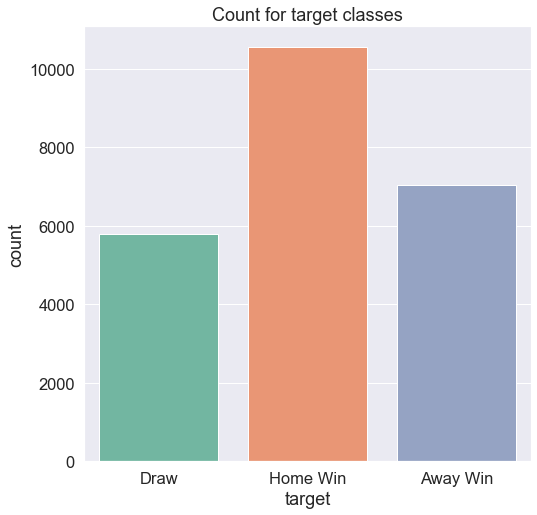

In [20]:
#plot the target to view the target class
plt.figure(figsize=(8,8))
ax=sns.countplot(x = soccer_data["target"],palette = 'Set2')
plt.title("Count for target classes")
labels=['Draw','Home Win','Away Win']
ax.set_xticklabels(labels)
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.title.set_color('white')
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.tick_params(axis='both', colors='white')
# fig=ax.get_figure()
# fig.savefig("target.png")
plt.show()

Looking at the target, you can see that the data is balance and it clearly shows that most matches always end with a home win. Now we will be looking at the features and visualizing how they correlate with the target while we check for multicollinearity.

# Visualization of the Data

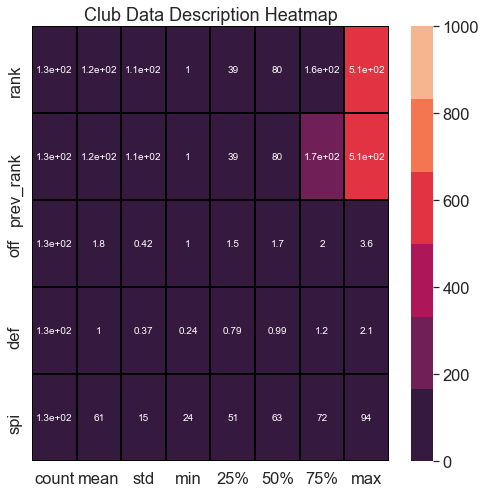

In [21]:
#let's visualize the club data description
plt.figure(figsize=(8,8))
ax=sns.heatmap(club_data.describe().transpose(),annot=True,
               linecolor='black',linewidths=1,vmin =0,vmax=1000,
               cmap=sns.color_palette('rocket'))
plt.title("Club Data Description Heatmap")
plt.show()

The club data is okay. we can now work on the soccer data

Text(0.5, 1.0, 'MultiCollinearity Btw target and Features ')

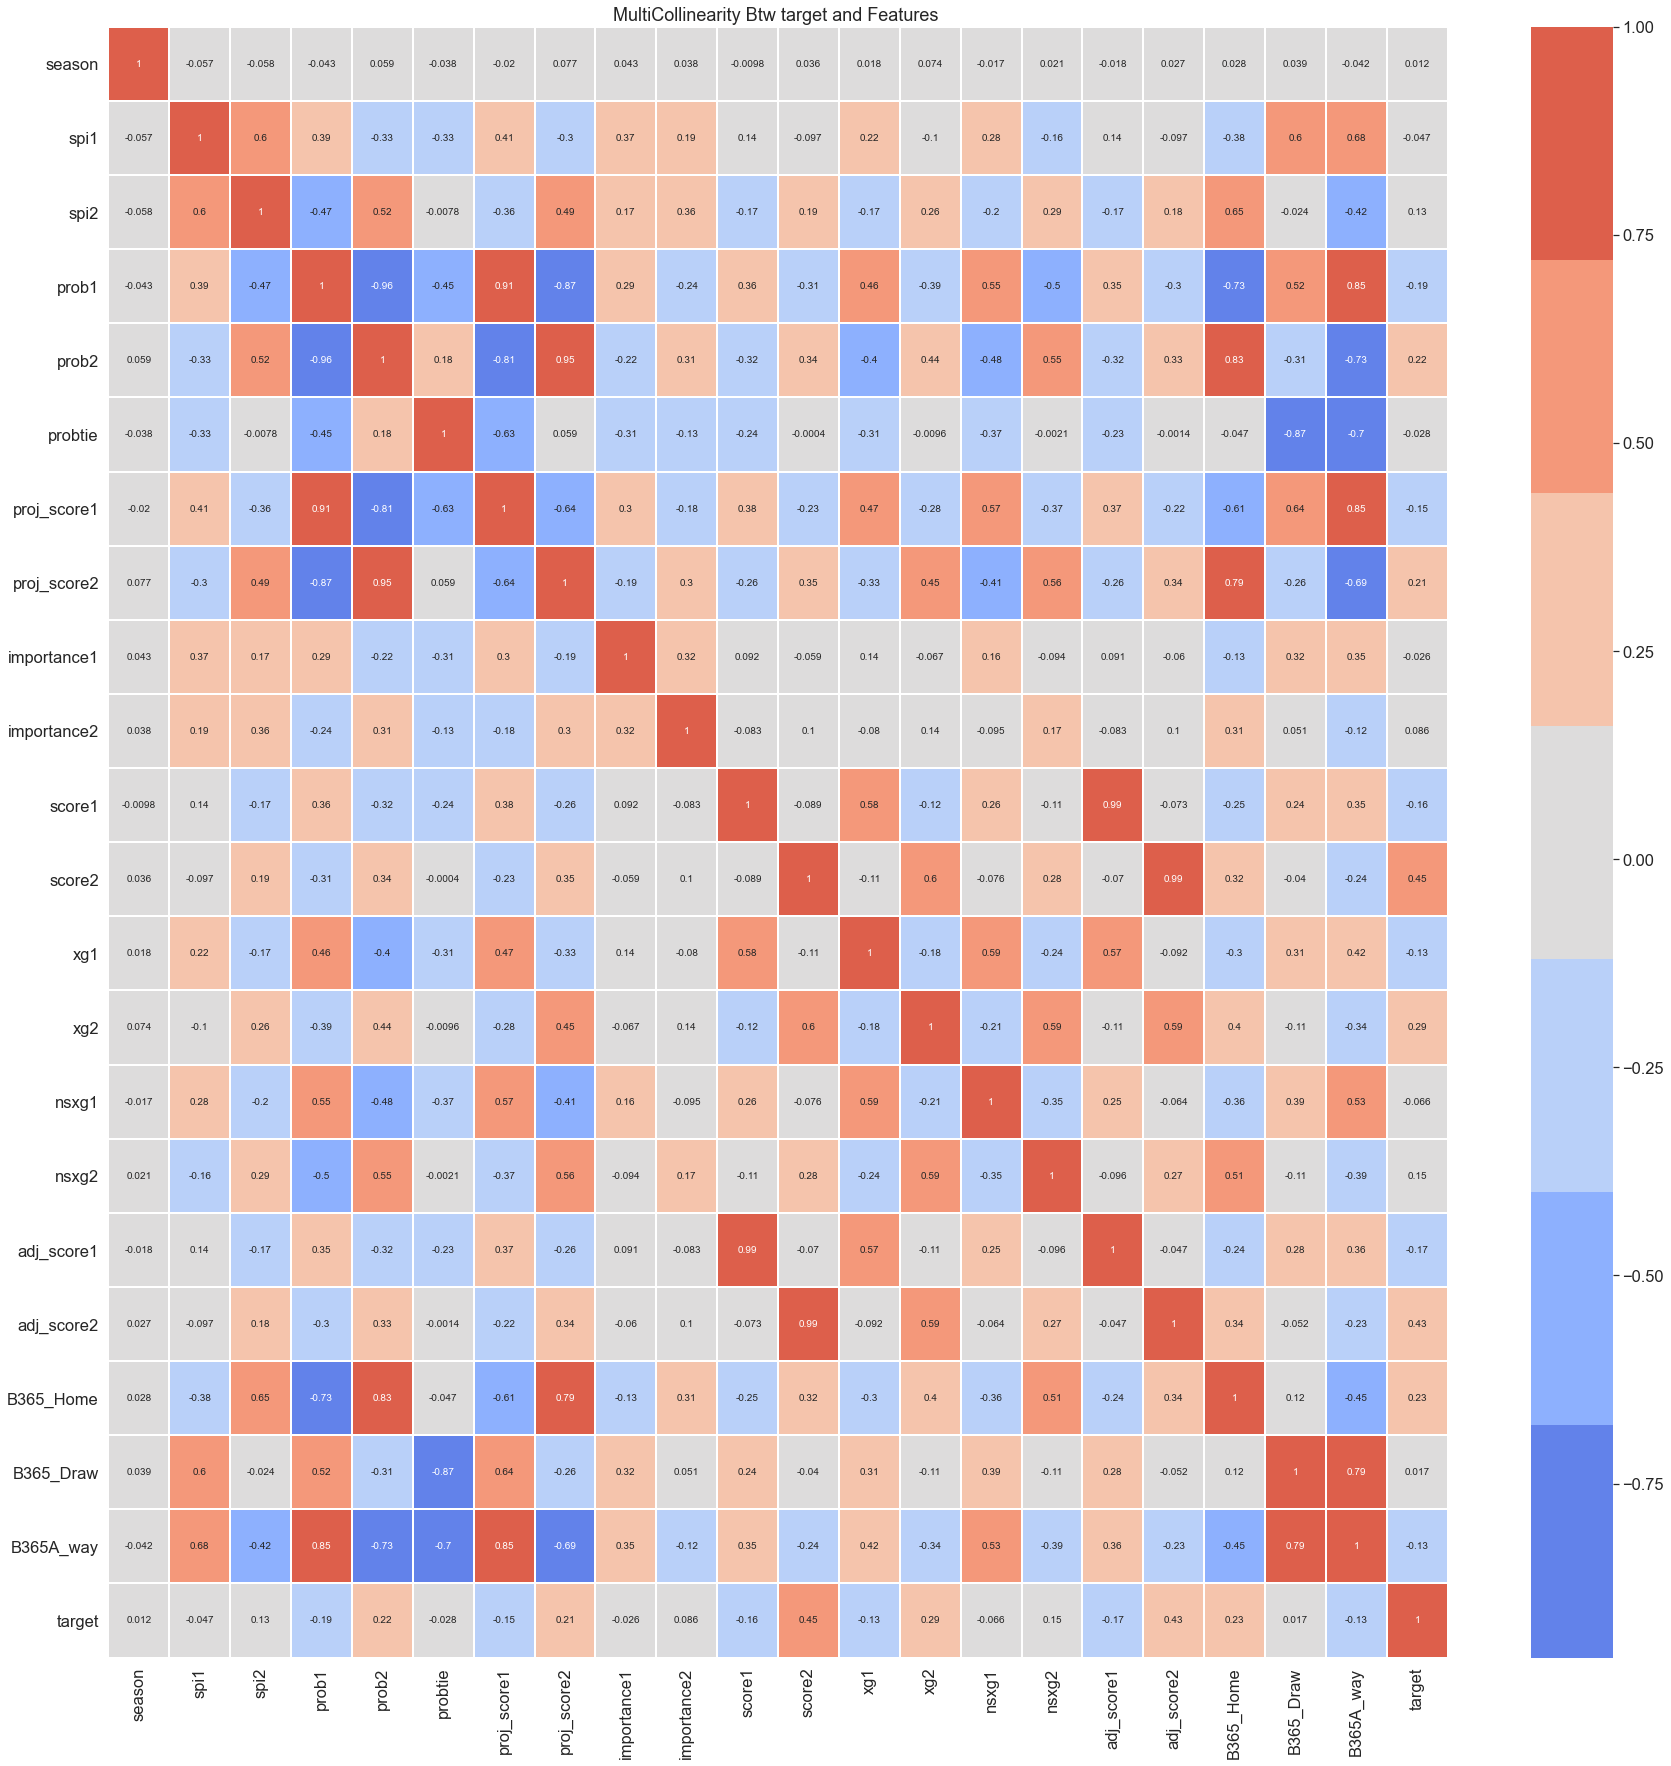

In [22]:
#let's visualize the multicolinearity among the features on soccer dataset
plt.figure(figsize=(30,30))
correlation = soccer_data.corr()
ax=sns.heatmap(correlation,annot=True,cmap =sns.color_palette('coolwarm',7),
              linewidths=1,linecolor='white')
plt.title("MultiCollinearity Btw target and Features ")

Looking at the table,there is multicollinearity between the scores and the adjusted scores. Also, there are some redundant columns that we need to drop because they will not add meaningful information to our model. I will drop the dates, nsxg1 and nsxg2, the projected scores due to the close correlation between the prob1 and prob2.

In [23]:
#drop redundant columns
soccer_final_df = soccer_data.drop(['date','nsxg1','nsxg2','proj_score1',
                                    'adj_score1','adj_score2','proj_score2',],axis =1)
soccer_final_df.head()

,season,league,team1,team2,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,B365_Home,B365_Draw,B365A_way,target
0,2016,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,32.4,67.7,0.0,1.0,0.97,0.63,NaN,NaN,NaN,2
1,2016,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.0,2.0,2.45,0.77,NaN,NaN,NaN,0
2,2016,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2.0,1.0,0.85,2.77,NaN,NaN,NaN,1
3,2016,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1.0,1.0,0.73,1.11,NaN,NaN,NaN,0
4,2016,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0.0,1.0,1.11,0.68,NaN,NaN,NaN,2


In [24]:
soccer_final_df.shape

(23390, 19)

In [25]:
soccer_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23390 entries, 0 to 24749
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       23390 non-null  int64  
 1   league       23390 non-null  object 
 2   team1        23390 non-null  object 
 3   team2        23390 non-null  object 
 4   spi1         12320 non-null  float64
 5   spi2         12320 non-null  float64
 6   prob1        12320 non-null  float64
 7   prob2        12320 non-null  float64
 8   probtie      12320 non-null  float64
 9   importance1  11899 non-null  float64
 10  importance2  11899 non-null  float64
 11  score1       23390 non-null  float64
 12  score2       23390 non-null  float64
 13  xg1          12314 non-null  float64
 14  xg2          12314 non-null  float64
 15  B365_Home    9660 non-null   float64
 16  B365_Draw    9660 non-null   float64
 17  B365A_way    9660 non-null   float64
 18  target       23390 non-null  int64  
dtypes: f

In [26]:
#fill the nan value with 0 for the odd columns
soccer_final_df.update(soccer_final_df[['B365_Home','B365_Draw','B365A_way']].fillna(0))

In [27]:
soccer_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23390 entries, 0 to 24749
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       23390 non-null  int64  
 1   league       23390 non-null  object 
 2   team1        23390 non-null  object 
 3   team2        23390 non-null  object 
 4   spi1         12320 non-null  float64
 5   spi2         12320 non-null  float64
 6   prob1        12320 non-null  float64
 7   prob2        12320 non-null  float64
 8   probtie      12320 non-null  float64
 9   importance1  11899 non-null  float64
 10  importance2  11899 non-null  float64
 11  score1       23390 non-null  float64
 12  score2       23390 non-null  float64
 13  xg1          12314 non-null  float64
 14  xg2          12314 non-null  float64
 15  B365_Home    23390 non-null  float64
 16  B365_Draw    23390 non-null  float64
 17  B365A_way    23390 non-null  float64
 18  target       23390 non-null  int64  
dtypes: f

In [28]:
soccer_final_df.shape

(23390, 19)

Text(0.5, 1.0, 'MultiCollinearity Btw target and Features ')

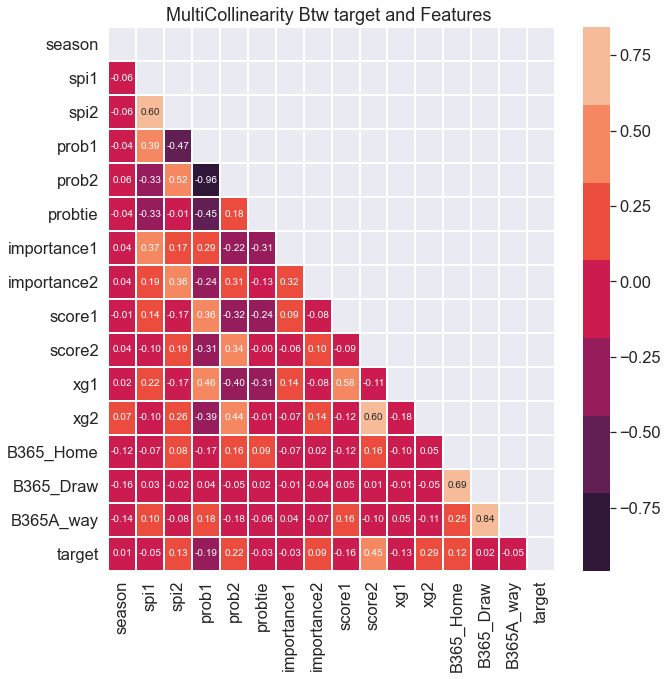

In [29]:
#plot the new dataframe to check multicollinearity
plt.figure(figsize = (10,10))
ax = sns.heatmap(soccer_final_df.corr(),mask =np.triu(np.ones_like(soccer_final_df.corr(),dtype = bool)), 
            annot = True,cmap =sns.color_palette('rocket',7),
            linewidths=1,linecolor='white',fmt='.2f')
plt.title("MultiCollinearity Btw target and Features ")

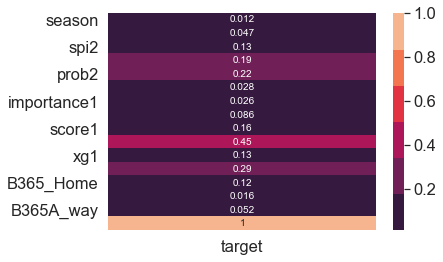

In [30]:
#checking to see the most correlated features
sns.heatmap(abs(soccer_final_df.corr())[['target']], annot = True,
            cmap =sns.color_palette('rocket'));

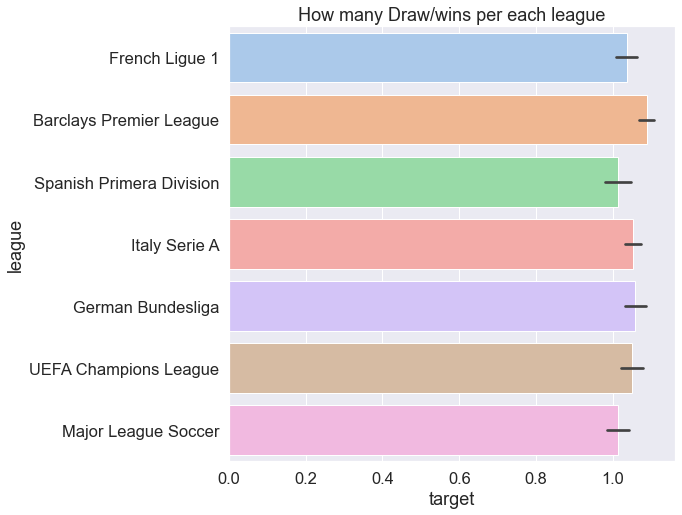

In [31]:
#plot a bargraph to see the features 
plt.figure(figsize=(8,8))
ax=sns.barplot(data = soccer_final_df,x ='target',y ='league',palette = 'pastel')
plt.title("How many Draw/wins per each league")
plt.show()

Looking at the above chart, it shows that most of the leagues win the game at home. We are going to look at the target again using the probability scores and probtie columns but before then we are going to drop the league column and some other columns that will not be needed because we do not have enough odds to use in building the predictive model. Most of the data in B365 column is nan, even with the fill of zeros, it is not enough for what I need it for.

In [32]:
#drop more columns due to alot of nan values 
soccer_df = soccer_final_df.drop(['league','B365_Home','B365_Draw','B365A_way'],axis =1)
soccer_df = soccer_df.dropna().reset_index(drop=True)
soccer_df.head(10)

,season,team1,team2,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target
0,2016,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,32.4,67.7,0.0,1.0,0.97,0.63,2
1,2016,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.0,2.0,2.45,0.77,0
2,2016,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2.0,1.0,0.85,2.77,1
3,2016,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1.0,1.0,0.73,1.11,0
4,2016,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0.0,1.0,1.11,0.68,2
5,2016,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1.0,1.0,1.40,0.55,0
6,2016,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0.0,1.0,1.24,1.84,2
7,2016,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1.0,1.0,1.05,0.22,0
8,2016,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,3.0,2.0,1.03,1.84,1
9,2016,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2.0,1.0,2.14,1.25,1


In [33]:
soccer_df.tail(10)

,season,team1,team2,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target
11884,2021,Borussia Monchengladbach,SpVgg Greuther Fürth,73.99,54.36,0.6454,0.1410,0.2136,41.2,30.5,4.0,0.0,2.20,0.31,1
11885,2021,Watford,Manchester United,59.62,80.86,0.1957,0.5770,0.2273,46.8,47.2,4.0,1.0,2.99,1.72,1
11886,2021,Burnley,Crystal Palace,65.84,71.28,0.3898,0.3436,0.2666,37.4,14.6,3.0,3.0,1.37,1.87,0
11887,2021,Newcastle,Brentford,61.00,69.45,0.3583,0.3789,0.2628,47.5,24.5,3.0,3.0,2.51,1.11,0
11888,2021,Norwich City,Southampton,55.19,69.71,0.2865,0.4382,0.2753,36.1,22.1,2.0,1.0,0.53,1.09,1
11889,2021,Aston Villa,Brighton and Hove Albion,70.01,76.08,0.3729,0.3578,0.2692,27.7,21.6,2.0,0.0,1.05,0.35,1
11890,2021,Wolverhampton,West Ham United,71.28,78.51,0.2841,0.4536,0.2623,12.7,59.5,1.0,0.0,1.44,0.42,1
11891,2021,Sevilla FC,Alavés,78.84,62.97,0.6454,0.1172,0.2374,70.4,28.3,2.0,2.0,1.46,1.41,0
11892,2021,Paris Saint-Germain,Nantes,81.85,58.75,0.7338,0.1002,0.1660,44.3,16.8,3.0,1.0,1.62,1.25,1
11893,2021,Lazio,Juventus,69.88,78.62,0.2984,0.4584,0.2432,51.4,73.0,0.0,2.0,0.34,2.73,2


In [34]:
soccer_df['team'] = soccer_df['team1'].combine_first(soccer_df['team2'])
soccer_df.head()

,season,team1,team2,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
0,2016,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,32.4,67.7,0.0,1.0,0.97,0.63,2,Bastia
1,2016,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.0,2.0,2.45,0.77,0,AS Monaco
2,2016,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2.0,1.0,0.85,2.77,1,Hull City
3,2016,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1.0,1.0,0.73,1.11,0,Everton
4,2016,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0.0,1.0,1.11,0.68,2,Crystal Palace


In [35]:
soccer_df = soccer_df.drop(['team1','team2',],axis =1)
soccer_df = soccer_df.reset_index(drop=True)
soccer_df.head(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
0,2016,51.16,85.68,0.0463,0.8380,0.1157,32.4,67.7,0.0,1.0,0.97,0.63,2,Bastia
1,2016,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.0,2.0,2.45,0.77,0,AS Monaco
2,2016,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2.0,1.0,0.85,2.77,1,Hull City
3,2016,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1.0,1.0,0.73,1.11,0,Everton
4,2016,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0.0,1.0,1.11,0.68,2,Crystal Palace
5,2016,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1.0,1.0,1.40,0.55,0,Middlesbrough
6,2016,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0.0,1.0,1.24,1.84,2,Burnley
7,2016,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1.0,1.0,1.05,0.22,0,Southampton
8,2016,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,3.0,2.0,1.03,1.84,1,Bordeaux
9,2016,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2.0,1.0,2.14,1.25,1,Manchester City


In [36]:
data=soccer_df['team']
team_df = pd.DataFrame(data)
team_df =team_df.drop_duplicates()
#(For streamlit app)
team_df

,team
0,Bastia
1,AS Monaco
2,Hull City
3,Everton
4,Crystal Palace
...,...
11085,VfL Bochum
11194,Salernitana
11274,Malmo FF
11281,FC Sheriff Tiraspol


In [37]:
soccer_df.shape

(11894, 14)

In [38]:
group_df = soccer_df.groupby(['team'],as_index=False)['target'].count().sort_values('team',ascending=False)
group_df.reset_index(drop=True,inplace=True)
group_df

,team,target
0,Zenit St Petersburg,8
1,Young Boys,5
2,Wolverhampton,63
3,West Ham United,99
4,West Bromwich Albion,55
...,...,...
203,AFC Bournemouth,74
204,AEK Athens,3
205,AC Milan,100
206,1. FC Union Berlin,40


In [39]:
soccer_df.shape

(11894, 14)

In [40]:
soccer_df.isnull().sum()

season         0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
target         0
team           0
dtype: int64

Now that we have been able to pare down the dataset,we can go ahead and plot a 3d plot that will show the fulltime results using the predicted probabilities of a soccer game.


0: Draw
1: Home Win
2: Away Win


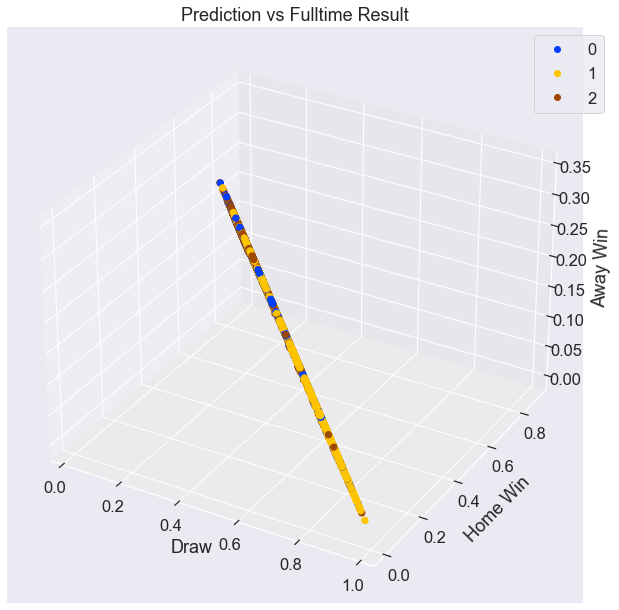

In [46]:
#plot the probabilities

# axes instance
df = soccer_df
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
fig.add_axes(ax)

x = df['prob1']
y = df['prob2']
z = df['probtie']

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("bright", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df['target'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel("Draw")
ax.set_ylabel("Home Win",labelpad=10.0)
ax.set_zlabel("Away Win",labelpad=10.0)
ax.set_title("Prediction vs Fulltime Result")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=1)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

#make the font bold 
bold_start = '\033[1m'


print(bold_start)
print('0: Draw')
print('1: Home Win')
print('2: Away Win')

Also, I will plot the distribution of the features.

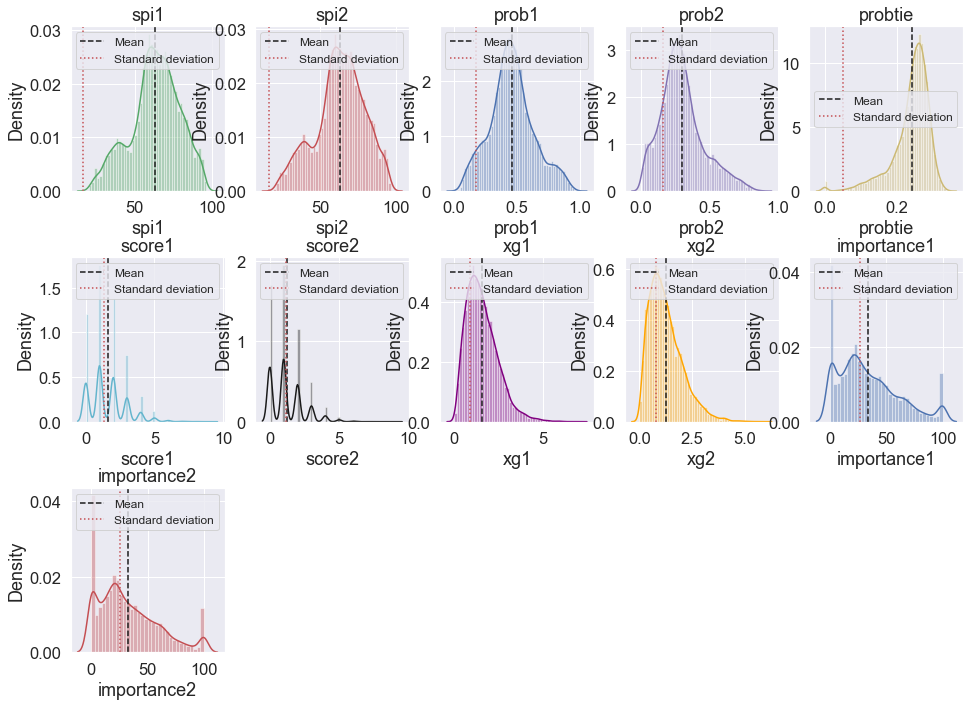

In [42]:
#plot distribution of all features
columns = ['spi1','spi2','prob1','prob2','probtie','score1','score2','xg1','xg2','importance1','importance2']
length = len(columns)
colors= ['g','r','b','m','y','c','k','purple','orange','b','r']

plt.figure(figsize=(16,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/2, j+1)
    sns.distplot(soccer_df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    plt.axvline(soccer_df[i].mean(), color='k', linestyle='dashed',label='Mean')
    plt.axvline(soccer_df[i].std(), color='r', linestyle='dotted',label='Standard deviation')
    plt.legend(loc='best',prop={'size':12})

The SPIs and the Probs seems to follow almost a normal distribution, which is what we want actually. Now we are going to compare the features with the target using boxplots.

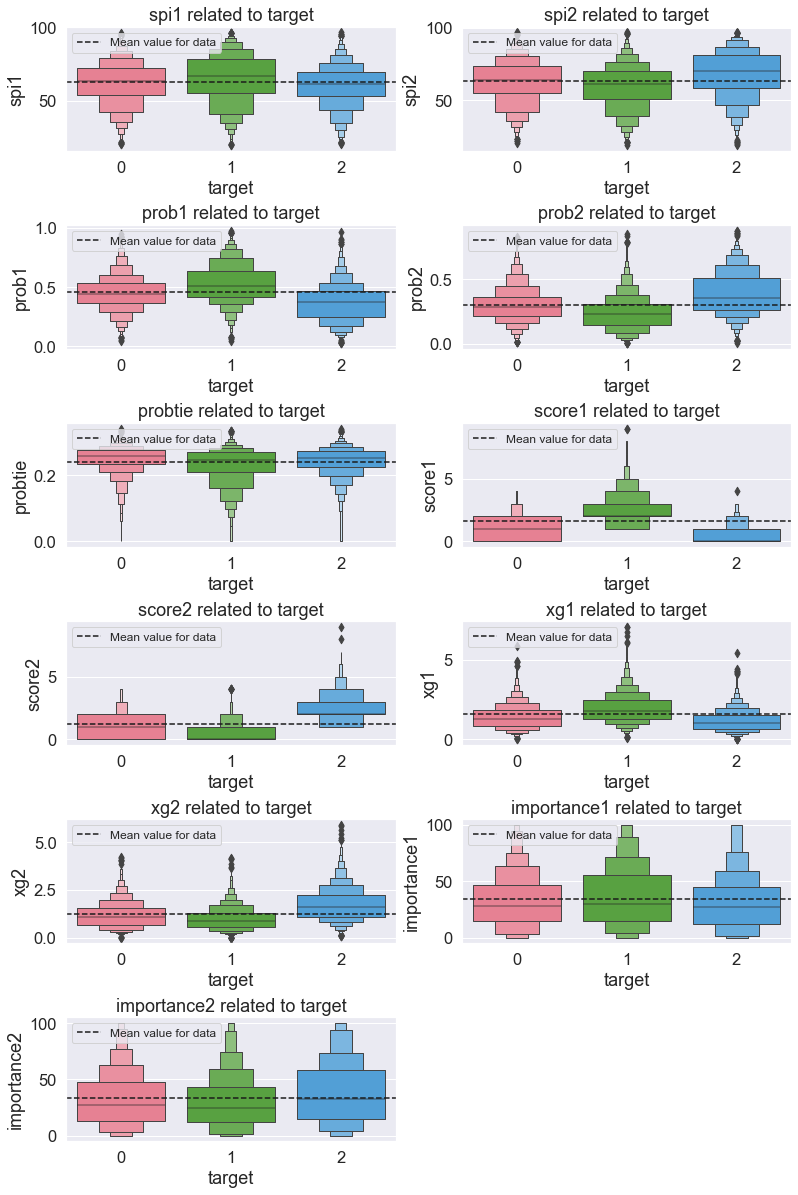

In [43]:
#visualize the target if it related to the correlated features
cols = ['spi1','spi2','prob1','prob2','probtie','score1','score2','xg1','xg2','importance1','importance2']

columns = [x for x in cols if x not in ['target_class']]
length = len(columns)

plt.figure(figsize=(13,18))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(6,2,j+1)
    plt.subplots_adjust(bottom =1/50)
    sns.boxenplot(x=soccer_df['target'],y=soccer_df[i],palette = 'husl')
    plt.title(i + " related to target")
    plt.subplots_adjust(hspace = .6)
    plt.axhline(soccer_df[i].mean(), color='k', linestyle='dashed',label='Mean value for data')
    plt.legend(loc='upper left',prop={'size':12})

As you can see the EDA and visualization really tells us alot about the dataset. Now I am going to use the features to build a predictive model that is going to prompt users for probability of the clubs winning the match either home or away.

In [44]:
#saving the final soccer data to csv
soccer_df.to_csv('../Data/soccer-spi/soccer_df.csv')


In [45]:
#saving the club soccer data to csv
club_data.to_csv('../Data/soccer-spi/club_data.csv')